In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
# Creating input and output

X = dataset[['Age','EstimatedSalary']]
y = dataset['Purchased'].values

In [8]:
# Standardization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)

In [11]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.25 , random_state = 0)

In [12]:
# random forest Classifier

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=10 , criterion='entropy')
# entropy is a unit to measure homogenity

In [13]:
classifier.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
#making predictoins

ypred = classifier.predict(Xtest)

In [15]:
# evaluatoin metrics

from sklearn.metrics import confusion_matrix

confusion_matrix(ytest,ypred)

array([[64,  4],
       [ 4, 28]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


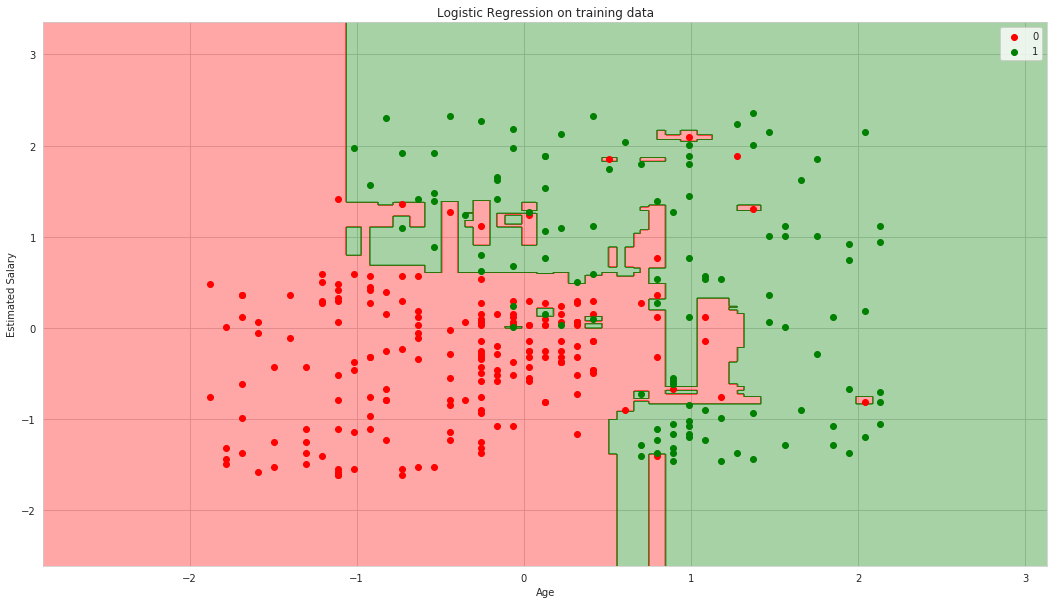

In [17]:
# Visualization

# Visualizing Logistic Regression On Training Data

sns.set_style('whitegrid')
plt.figure(figsize = (18,10))
from matplotlib.colors import ListedColormap

X_set , y_set = Xtrain , ytrain

#-------------------

X1 , X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1 , stop = X_set[:,0].max() + 1 , step = 0.01) ,
                      np.arange(start = X_set[:,1].min() - 1 , stop = X_set[:,1].max() + 1 , step = 0.01))

# meshgrid converts a 1D array into a matrix conining the rectangular coordinates for that points in the array
# and here we are taking arange two times because we have two parameters deciding the value

#-------------------
plt.contourf(X1 ,X2 , classifier.predict(np.array([X1.ravel() , X2.ravel()]).T).reshape(X1.shape) , alpha = 0.35,
            cmap = ListedColormap(('red' , 'green')))

# contour fill plot is used to plot contours and fill the regions having same value with some color
# ravel converts a n dim matrix into an 1D array

#------------------
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

#--------------------

for i , j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j , 0] , X_set[y_set == j , 1] , c = ListedColormap(('red','green'))(i) , label = j)

# enumerate returns the a set of labels and for each unique value in the array returned by unique()
# here in this case j will be 0 ,1 i.e the unique values and i will be 0,1 i.e the label assigned to this values

plt.title('Logistic Regression on training data')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


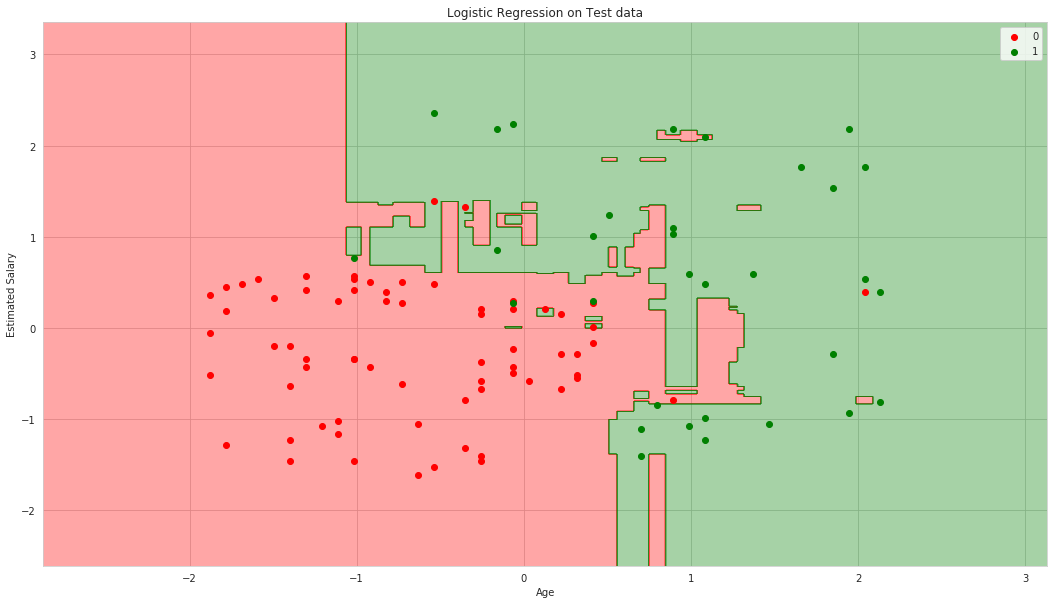

In [18]:
# Visualizing Logistic Regression On Test Data

sns.set_style('whitegrid')
plt.figure(figsize = (18,10))
from matplotlib.colors import ListedColormap

X_set , y_set = Xtest , ytest

#-------------------

X1 , X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1 , stop = X_set[:,0].max() + 1 , step = 0.01) ,
                      np.arange(start = X_set[:,1].min() - 1 , stop = X_set[:,1].max() + 1 , step = 0.01))

# meshgrid converts a 1D array into a matrix conining the rectangular coordinates for that points in the array
# and here we are taking arange two times because we have two parameters deciding the value

#-------------------
plt.contourf(X1 ,X2 , classifier.predict(np.array([X1.ravel() , X2.ravel()]).T).reshape(X1.shape) , alpha = 0.35,
            cmap = ListedColormap(('red' , 'green')))

# the classifier here predixts the values and plots them which appers to us as the coloured regions
# contour fill plot is used to plot contours and fill the regions having same value with some color
# ravel converts a n dim matrix into an 1D array

#------------------
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

#--------------------

for i , j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j , 0] , X_set[y_set == j , 1] , c = ListedColormap(('red','green'))(i) , label = j)

# enumerate returns the a set of labels and for each unique value in the array returned by unique()
# here in this case j will be 0 ,1 i.e the unique values and i will be 0,1 i.e the label assigned to this values

plt.title('Logistic Regression on Test data')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()